# Problem Statement:
A Company wants to automate the loan eligibility process based on customer details provided while filling online application form. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount, Required Loan Term, Credit History and others. The requirements are as follows:

1.)Check eligibility of the Customer given the inputs described above.(Classification)

# Filter Warnings

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Read Dataset

In [2]:
import pandas as pd
A=pd.read_csv("C:/Users/saurabh firke/Downloads/training_set_hl.csv")

# Preview

In [3]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


# Missing Data Treatment

In [5]:
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
for i in A.columns:
    if(A[i].dtypes=="object"):
        x=A[i].mode()[0]
        A[i]=A[i].fillna(x)
    else:
        x=A[i].mean()
        A[i]=A[i].fillna(x)

In [7]:
A.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Define X and Y

In [8]:
Y=A[["Loan_Status"]]
X=A.drop(labels=["Loan_Status","Loan_ID"],axis=1)

In [9]:
#Y

In [10]:
#X

# EDA

Devide Data In Cat And Con

In [11]:
cat=[]
con=[]
for i in X.columns:
    if(X[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [12]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [13]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [14]:
def ANOVA(df,cat,con):
    from statsmodels.formula.api import ols
    relation=con+"~"+cat
    model=ols(relation,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results=anova_lm(model)
    return round(anova_results.iloc[0,4],4)

In [15]:
for i in con:
    print("-------","Loan_Staus v/s",i,"-------")
    print(ANOVA(A,"Loan_Status",i))

------- Loan_Staus v/s ApplicantIncome -------
0.9025
------- Loan_Staus v/s CoapplicantIncome -------
0.1424
------- Loan_Staus v/s LoanAmount -------
0.3677
------- Loan_Staus v/s Loan_Amount_Term -------
0.604
------- Loan_Staus v/s Credit_History -------
0.0


In [16]:
def chisq(df,cat1,cat2):
    import pandas as pd
    from scipy.stats import chi2_contingency
    ct=pd.crosstab(df[cat1],df[cat2])
    a,b,c,d=chi2_contingency(ct)
    return b

In [17]:
for i in cat:
    print("-----","Loan_Status v/s",i,"-----")
    print(chisq(A,"Loan_Status",i))

----- Loan_Status v/s Gender -----
0.7391461310869638
----- Loan_Status v/s Married -----
0.029608580862582116
----- Loan_Status v/s Dependents -----
0.3688663081366005
----- Loan_Status v/s Education -----
0.04309962129357355
----- Loan_Status v/s Self_Employed -----
0.9710746411403309
----- Loan_Status v/s Property_Area -----
0.0021360187811644915


# Preprocessing

In [18]:
X=X[["Credit_History","CoapplicantIncome","Property_Area","Education","Married"]]

In [19]:
X

,Credit_History,CoapplicantIncome,Property_Area,Education,Married
0,1.0,0.0,Urban,Graduate,No
1,1.0,1508.0,Rural,Graduate,Yes
2,1.0,0.0,Urban,Graduate,Yes
3,1.0,2358.0,Urban,Not Graduate,Yes
4,1.0,0.0,Urban,Graduate,No
...,...,...,...,...,...
609,1.0,0.0,Rural,Graduate,No
610,1.0,0.0,Rural,Graduate,Yes
611,1.0,240.0,Urban,Graduate,Yes
612,1.0,0.0,Urban,Graduate,Yes


In [20]:
from pm6 import preprocessing  ##preprocessing
Xnew=preprocessing(X)

In [21]:
Xnew

,Credit_History,CoapplicantIncome,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Education_Graduate,Education_Not Graduate,Married_No,Married_Yes
0,0.451640,-0.554368,0,0,1,1,0,1,0
1,0.451640,-0.038610,1,0,0,1,0,0,1
2,0.451640,-0.554368,0,0,1,1,0,0,1
3,0.451640,0.252103,0,0,1,0,1,0,1
4,0.451640,-0.554368,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...
609,0.451640,-0.554368,1,0,0,1,0,1,0
610,0.451640,-0.554368,1,0,0,1,0,0,1
611,0.451640,-0.472284,0,0,1,1,0,0,1
612,0.451640,-0.554368,0,0,1,1,0,0,1


In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Decision Tree Model

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy",random_state=21,max_depth=2)
model=dtc.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc=accuracy_score(ytrain,pred_tr)
ts_acc=accuracy_score(ytest,pred_ts)
print(tr_acc,ts_acc)

0.8065173116089613 0.8211382113821138


# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion="entropy",random_state=21,max_depth=3)
model=rfc.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc=accuracy_score(ytrain,pred_tr)
ts_acc=accuracy_score(ytest,pred_ts)
print(tr_acc,ts_acc)

0.8105906313645621 0.8211382113821138


# Getting Data Ready For Testing Data

In [25]:
B=pd.read_csv("C:/Users/saurabh firke/Downloads/testing_set_hl.csv")

In [26]:
B.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [27]:
B1=B[X.columns].head()

In [28]:
B1

,Credit_History,CoapplicantIncome,Property_Area,Education,Married
0,1.0,0,Urban,Graduate,Yes
1,1.0,1500,Urban,Graduate,Yes
2,1.0,1800,Urban,Graduate,Yes
3,NaN,2546,Urban,Graduate,Yes
4,1.0,0,Urban,Not Graduate,No


# Missing Data Treatment

In [29]:
B.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [30]:
from pm6 import replacer  ##missing data treatment
replacer(B)

In [31]:
B.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [32]:
cat=[]
con=[]
for i in B.columns:
    if(B[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [33]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [34]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [35]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
B1=pd.DataFrame(ss.fit_transform(B[con]),columns=con)
B2=pd.get_dummies(B[cat])
Bnew=B2.join(B1)

In [36]:
B1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.186461,-0.673335,-0.429368,0.270603,0.47918
1,-0.352692,-0.029848,-0.166482,0.270603,0.47918
2,0.039641,0.098849,1.180807,0.270603,0.47918
3,-0.502774,0.418877,-0.593671,0.270603,0.00000
4,-0.311909,-0.673335,-0.955139,0.270603,0.47918
...,...,...,...,...,...
362,-0.162439,0.088982,-0.380077,0.270603,0.47918
363,-0.132056,-0.369180,-0.347216,0.270603,0.47918
364,-0.317211,0.181644,-0.166482,0.270603,0.00000
365,0.039641,0.353241,0.359289,0.270603,0.47918


In [37]:
B2

,Loan_ID_LP001015,Loan_ID_LP001022,Loan_ID_LP001031,Loan_ID_LP001035,Loan_ID_LP001051,Loan_ID_LP001054,Loan_ID_LP001055,Loan_ID_LP001056,Loan_ID_LP001059,Loan_ID_LP001067,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [38]:
Bnew

,Loan_ID_LP001015,Loan_ID_LP001022,Loan_ID_LP001031,Loan_ID_LP001035,Loan_ID_LP001051,Loan_ID_LP001054,Loan_ID_LP001055,Loan_ID_LP001056,Loan_ID_LP001059,Loan_ID_LP001067,...,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0.186461,-0.673335,-0.429368,0.270603,0.47918
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,-0.352692,-0.029848,-0.166482,0.270603,0.47918
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0.039641,0.098849,1.180807,0.270603,0.47918
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,-0.502774,0.418877,-0.593671,0.270603,0.00000
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,-0.311909,-0.673335,-0.955139,0.270603,0.47918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,-0.162439,0.088982,-0.380077,0.270603,0.47918
363,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,-0.132056,-0.369180,-0.347216,0.270603,0.47918
364,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,-0.317211,0.181644,-0.166482,0.270603,0.00000
365,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0.039641,0.353241,0.359289,0.270603,0.47918


In [39]:
ready_for_pred=Bnew[Xnew.columns]

In [40]:
pred_final=model.predict(ready_for_pred)

In [41]:
pred_final

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [42]:
E=pd.DataFrame([B.Loan_ID,pred_final]).T
E.columns=["Loan_ID","Loan_Status"]

In [43]:
E

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [44]:
E.to_csv("C:/Users/saurabh firke/Downloads/lsp.csv",index=None)

# If customer is not eligible for the input required amount and duration:¶
a.)what can be amount for the given duration.(Regression)

In [45]:
B["Loan_Status"]=pred_final

In [46]:
B.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,Y


In [47]:
B.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Find out people for whom loan was rejected(testing set)

In [49]:
xtest=B[B.Loan_Status=="N"]
xtest_1=xtest.drop(labels=["Loan_ID","LoanAmount","Loan_Status"],axis=1)

In [50]:
xtest_1.index=range(0,xtest_1.shape[0])

# Create training data based on above predictors

In [52]:
xtest_1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,2,Not Graduate,No,3881,0,360.0,0.0,Rural
1,Male,Yes,2,Graduate,No,12173,0,360.0,0.0,Semiurban
2,Male,No,0,Graduate,No,0,24000,360.0,0.0,Rural
3,Male,No,0,Graduate,No,3150,0,360.0,0.0,Semiurban
4,Male,No,0,Graduate,No,2750,0,360.0,0.0,Urban


In [53]:
Q=A[xtest_1.columns]

In [55]:
Q["LS"]=A.Loan_Status

In [56]:
Q.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LS
0,Male,No,0,Graduate,No,5849.00000,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.00000,0.0,360.0,1.0,Urban,Y


In [57]:
Q=Q[Q.LS=="Y"]
Q=Q.drop(labels=["LS"],axis=1)

In [59]:
Q.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.0,0.0,360.0,1.0,Urban
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000.0,0.0,360.0,1.0,Urban
5,Male,Yes,2,Graduate,Yes,5417.0,4196.0,360.0,1.0,Urban


In [62]:
R=A[["LoanAmount"]]
R=R.iloc[Q.index,:]
R.index=range(0,R.shape[0])

In [63]:
R

,LoanAmount
0,146.412162
1,66.000000
2,120.000000
3,141.000000
4,267.000000
...,...
417,108.000000
418,71.000000
419,40.000000
420,253.000000


In [64]:
Q.index=range(0,Q.shape[0])

In [67]:
Q.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.0,0.0,360.0,1.0,Urban
1,Male,Yes,0,Graduate,Yes,3000.0,0.0,360.0,1.0,Urban
2,Male,Yes,0,Not Graduate,No,2583.0,2358.0,360.0,1.0,Urban
3,Male,No,0,Graduate,No,6000.0,0.0,360.0,1.0,Urban
4,Male,Yes,2,Graduate,Yes,5417.0,4196.0,360.0,1.0,Urban


# Preprocessing

In [66]:
replacer(Q)   #missing data treatment
replacer(xtest_1)

In [68]:
from pm6 import preprocessing    ##preprocessing
xtrain=preprocessing(Q)
xtest_final=preprocessing(xtest_1)

In [76]:
xtest_final.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.061592,-0.567707,0.143794,0.0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0
1,3.730055,-0.567707,0.143794,0.0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0
2,-1.655400,6.685376,0.143794,0.0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0
3,-0.261809,-0.567707,0.143794,0.0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
4,-0.438773,-0.567707,0.143794,0.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [69]:
ytrain=R.LoanAmount

In [70]:
ytrain.head()

0    146.412162
1     66.000000
2    120.000000
3    141.000000
4    267.000000
Name: LoanAmount, dtype: float64

# Regression Model

In [71]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(xtrain,ytrain)
pred=model.predict(xtest_final)

In [73]:
pred.shape

(59,)

In [74]:
pred

array([140.76282884, 340.98887023, 167.44009611, 108.34716488,
        97.92989025, 139.21375108,  95.72410567, 140.91979522,
       126.69845822, 137.37645312, 162.3882514 , 162.96968459,
       125.70134756, 182.87814716, 112.50349217,  80.3519515 ,
       118.676172  ,  85.87091315, 100.7479767 , 133.6684905 ,
       320.96099213, 184.88676045, 151.84864623, 213.26225442,
       240.32081636, 117.2343788 , 104.03410412,  73.01468012,
        68.16287152, 121.82167629,  94.52236613, 104.73290799,
       153.72808893, 133.0056771 , 175.04357448, 120.12395518,
       178.42122479, 175.51193393, 173.08154086, 100.36649536,
       112.16208568, 144.86167816, 121.51234457, 112.65882731,
       161.59599456, 108.50934213, 157.27788765, 204.81961608,
       192.41989475, 113.4063788 , 143.12129572, 105.01449359,
       208.77720141, 143.72001335,  85.34117815,  66.50746875,
       151.82643905, 142.63575017, 153.91191277])

In [77]:
act=B[B.Loan_Status=="N"]["LoanAmount"]

In [78]:
act

7      147.000000
13     166.000000
25     148.000000
35     176.000000
55     130.000000
58     176.000000
63     108.000000
66     135.000000
67     130.000000
69     188.000000
80     163.000000
82     149.000000
84     131.000000
94     123.000000
101    136.132597
106    119.000000
117     80.000000
118    104.000000
119    213.000000
123    187.000000
124    300.000000
126     71.000000
140    150.000000
142    139.000000
147    199.000000
153    117.000000
161     84.000000
165    170.000000
166    120.000000
168     94.000000
173    159.000000
174    110.000000
192    180.000000
193    128.000000
196    114.000000
198    104.000000
211    200.000000
224    187.000000
229    125.000000
235    176.000000
236    117.000000
241    105.000000
243    125.000000
245    150.000000
250    142.000000
255    123.000000
266    112.000000
268     49.000000
273    130.000000
274     94.000000
278    176.000000
293     88.000000
301    125.000000
311    153.000000
317     67.000000
325     95

In [79]:
act.index=range(0,59)

In [80]:
act

0     147.000000
1     166.000000
2     148.000000
3     176.000000
4     130.000000
5     176.000000
6     108.000000
7     135.000000
8     130.000000
9     188.000000
10    163.000000
11    149.000000
12    131.000000
13    123.000000
14    136.132597
15    119.000000
16     80.000000
17    104.000000
18    213.000000
19    187.000000
20    300.000000
21     71.000000
22    150.000000
23    139.000000
24    199.000000
25    117.000000
26     84.000000
27    170.000000
28    120.000000
29     94.000000
30    159.000000
31    110.000000
32    180.000000
33    128.000000
34    114.000000
35    104.000000
36    200.000000
37    187.000000
38    125.000000
39    176.000000
40    117.000000
41    105.000000
42    125.000000
43    150.000000
44    142.000000
45    123.000000
46    112.000000
47     49.000000
48    130.000000
49     94.000000
50    176.000000
51     88.000000
52    125.000000
53    153.000000
54     67.000000
55     95.000000
56    162.000000
57    133.000000
58    158.0000

In [81]:
E=range(0,59)

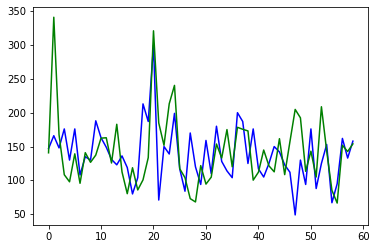

In [84]:
import matplotlib.pyplot as plt
plt.plot(E,act,c="blue")
plt.plot(E,pred,c="green")

# if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

In [85]:
B["Duration"]=B.Loan_Amount_Term/12

In [87]:
B.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Duration
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,Y,30.0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,Y,30.0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,Y,30.0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,Y,30.0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,Y,30.0


In [88]:
data_for_pred=B[(B.Duration<=20)&(B.Loan_Status=="Y")]
data_for_pred_final=data_for_pred.drop(labels=["Duration","Loan_ID","Loan_Status","Loan_Amount_Term"],axis=1)
data_for_pred_final.index=range(0,data_for_pred_final.shape[0])

In [89]:
data_for_pred_final.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,Male,Yes,2,Graduate,No,13633,0,280.0,1.000000,Urban
1,Male,No,3+,Graduate,No,4166,0,40.0,0.825444,Urban
2,Male,No,0,Graduate,No,1300,3470,100.0,1.000000,Semiurban
3,Female,No,3+,Not Graduate,No,2083,0,28.0,1.000000,Urban
4,Male,No,0,Graduate,No,2942,2382,125.0,1.000000,Urban


# Preparing Training Data

In [90]:
T=A[A.Loan_Status=="Y"]
T1=T[data_for_pred_final.columns]
T1.index=range(0,T1.shape[0])

In [92]:
T.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.000000,360.0,1.0,Urban,Y


In [94]:
T1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,1.0,Urban
1,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,1.0,Urban
2,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,1.0,Urban
3,Male,No,0,Graduate,No,6000.0,0.0,141.000000,1.0,Urban
4,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.000000,1.0,Urban


In [95]:
xtrain=preprocessing(T1)

In [96]:
ytrain=T["Loan_Amount_Term"]

In [97]:
ytrain.index=range(0,ytrain.shape[0])

In [98]:
replacer(data_for_pred_final)
final_pred=preprocessing(data_for_pred_final)

In [99]:
model=lm.fit(xtrain,ytrain)
pred=model.predict(final_pred)

In [100]:
pred

array([320.42245821, 303.8502644 , 371.39975742, 331.20934354,
       352.41188862, 327.8130921 , 312.09133831, 352.23195068,
       335.86595001, 332.1535083 , 335.26520921, 331.47999195,
       341.5054192 , 339.8408881 , 341.41058912, 342.08979093,
       331.18025633, 352.94853305, 350.07088508, 343.21045819,
       350.35805259, 362.12508122, 352.29365086, 351.30323148,
       322.93451216, 341.17745378, 355.20319721, 330.25795921,
       330.97707037])

In [102]:
final_pred.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,3.286495,-0.798641,2.950151,0.272166,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
1,-0.082500,-0.798641,-1.108566,-3.674235,0,1,1,0,0,0,0,1,1,0,1,0,0,0,1
2,-1.102415,0.995712,-0.093887,0.272166,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
3,-0.823771,-0.798641,-1.311502,0.272166,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1
4,-0.518081,0.433102,0.328896,0.272166,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [105]:
U=B[(B.Duration<=20)&(B.Loan_Status=="Y")][["Loan_Amount_Term"]]
U.index=range(0,U.shape[0])

In [106]:
U

,Loan_Amount_Term
0,240.0
1,180.0
2,180.0
3,180.0
4,180.0
5,180.0
6,180.0
7,180.0
8,180.0
9,60.0


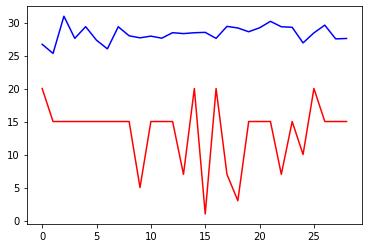

In [107]:
plt.plot(U/12,c="red")
plt.plot(pred/12,c="blue")